# 월마트 판매

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

from helper.regrassion import *
from helper.util import *
from helper.plot import *
from helper.analysis import *

from pandas import get_dummies

from imblearn.over_sampling import  SMOTE

### [2] 데이터 가져오기

| 변수명 | 설명 |
|:--:|--:|
| Store | Store number |
| Date | Sales week start date |
| Weekly_Sales | Store week sales |
| Holiday_Flag | Mark on the presence or absence of a holiday |
| Temperature | Air temperature in the region |
| Fuel_Price | Fuel cost in the region |
| CPI | Consumer price index(소비자 물가 지수) |
| Unemployment | Unemployment rate |

In [2]:
origin = my_read_data("./res/Walmart_sales.csv")
my_pretty_table(origin.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None

데이터프레임 상위 5개 행
+----+---------+------------+----------------+----------------+---------------+--------------+---------+----------------+
|    |   Store | Date       |   Weekly_Sales |   Holiday_Flag |   Temperature |   Fuel_Price |     CPI |   Unemployment |
|----+---------+------------+----------------+----------------+---------------+--------------+---------+----------------|
|  0 |       

## #02. 탐색적 데이터 분석 및 데이터 전처리

범주형 타입 변환

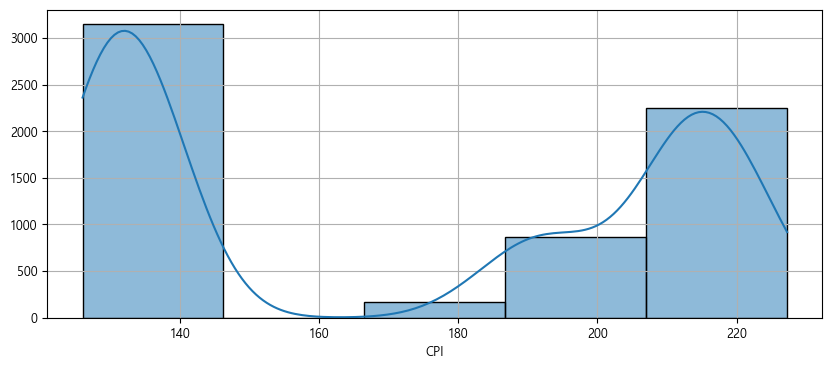

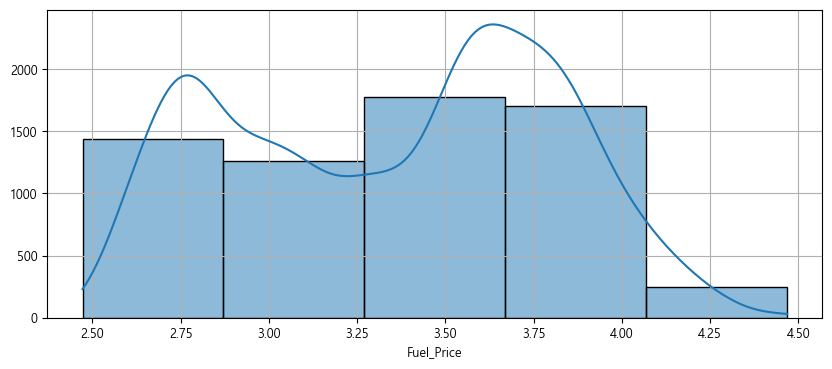

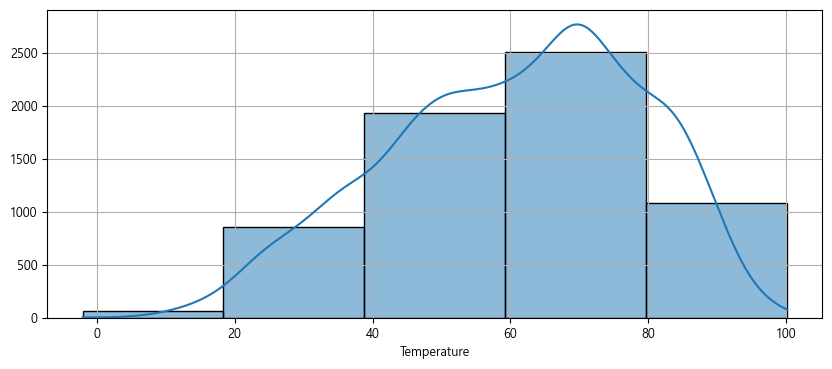

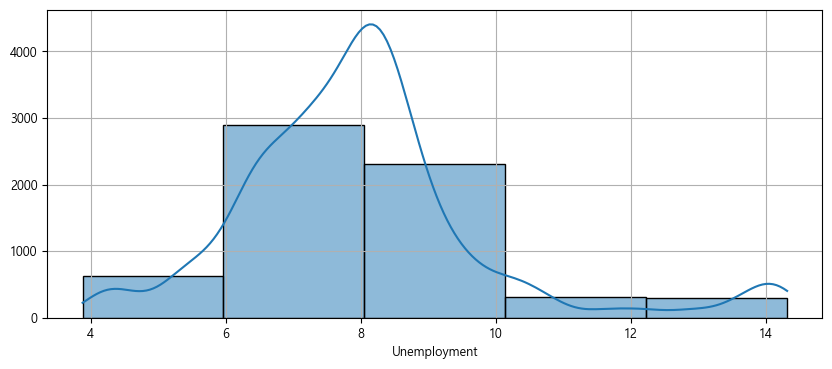

In [7]:
for c in ['CPI', 'Fuel_Price', 'Temperature', 'Unemployment']:
    my_histplot(origin, c, bins=5, dpi=100)

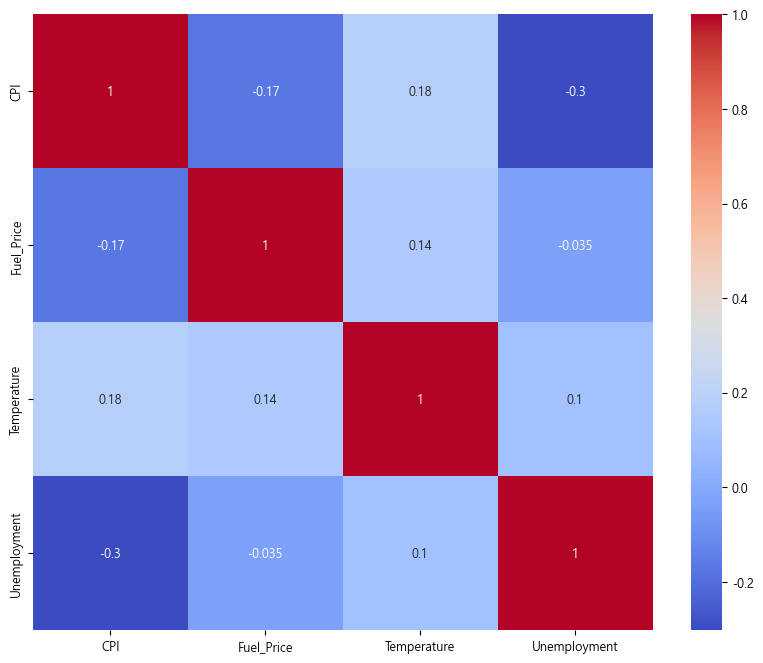

+---------------------------------+---------------+--------------+----------+
|                                 |   correlation |      p-value | result   |
|---------------------------------+---------------+--------------+----------|
| ('CPI', 'Fuel_Price')           |     -0.170642 |  3.04368e-43 | True     |
| ('CPI', 'Temperature')          |      0.176888 |  2.19451e-46 | True     |
| ('CPI', 'Unemployment')         |      -0.30202 | 8.04601e-136 | True     |
| ('Fuel_Price', 'Temperature')   |      0.144982 |   1.4378e-31 | True     |
| ('Fuel_Price', 'Unemployment')  |    -0.0346837 |   0.00539297 | True     |
| ('Temperature', 'Unemployment') |      0.101158 |  4.15278e-16 | True     |
+---------------------------------+---------------+--------------+----------+


In [38]:
my_correlation(origin[['CPI', 'Fuel_Price', 'Temperature', 'Unemployment']],dpi=100)

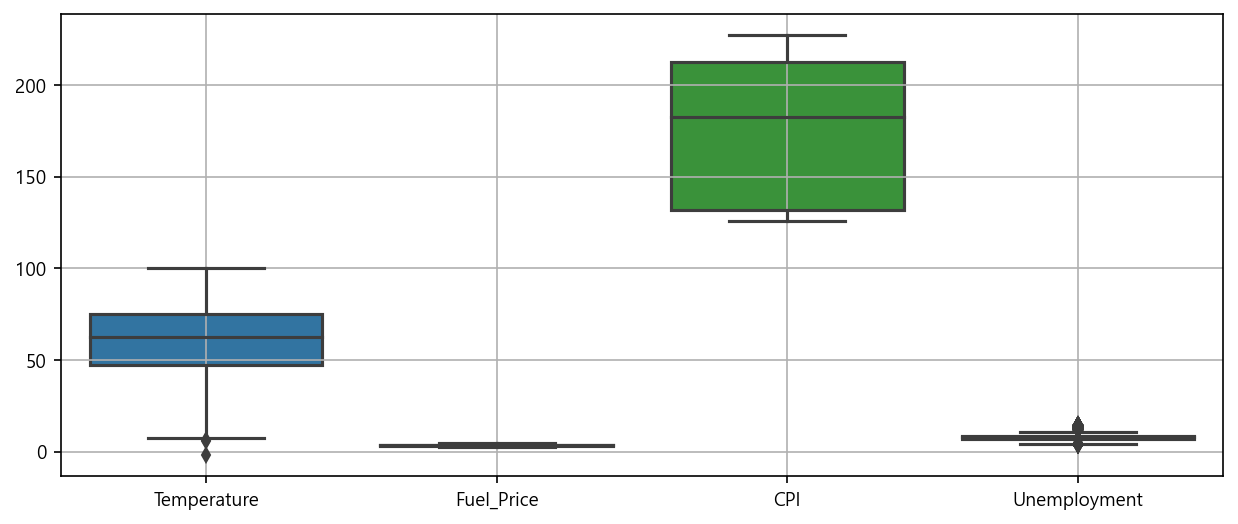

In [58]:
my_boxplot(df.drop('Weekly_Sales',axis=1))

### 데이터 표준화

#### 표준화 수행

In [59]:
df2 = my_standard_scaler(df, 'Weekly_Sales')
df2

,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag,Weekly_Sales
0,-0.995136,-1.713800,1.004175,0.056964,0,1643690.90
1,-1.201170,-1.766089,1.007880,0.056964,1,1641957.44
2,-1.124178,-1.840166,1.009074,0.056964,0,1611968.17
3,-0.760907,-1.737766,1.009849,0.056964,0,1409727.59
4,-0.767955,-1.598328,1.010624,0.056964,0,1554806.68
...,...,...,...,...,...,...
6430,0.228602,1.390883,0.519270,0.365109,0,713173.95
6431,0.229144,1.364738,0.523256,0.356046,0,733455.07
6432,-0.335825,1.397419,0.527241,0.356046,0,734464.36
6433,-0.227385,1.329879,0.527332,0.356046,0,718125.53


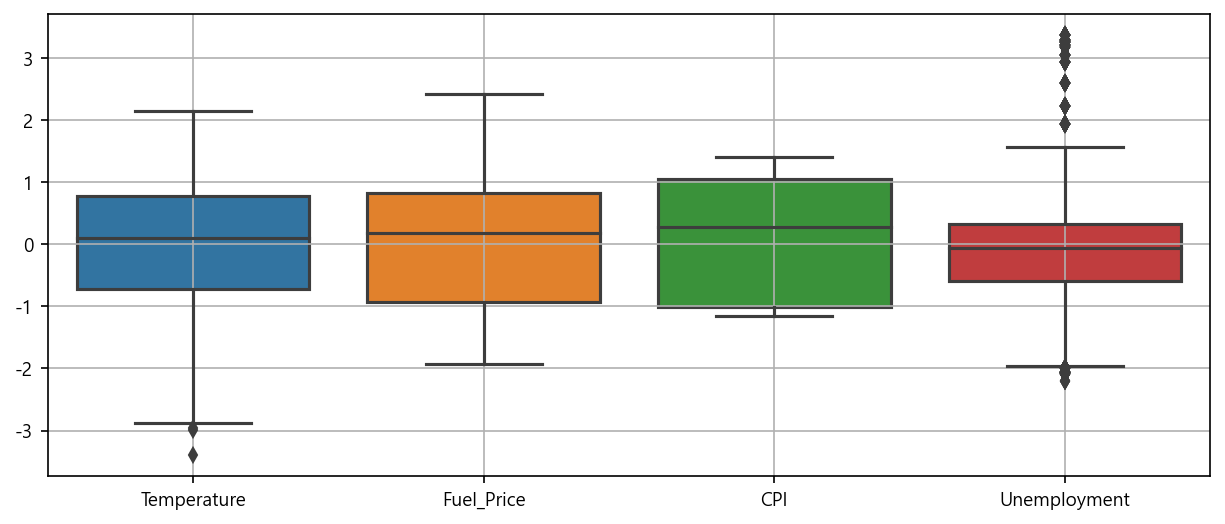

In [60]:
my_boxplot(df2.drop('Weekly_Sales',axis=1))

#### 이상치 제거

In [61]:
df3 = my_replace_outliner_to_nan(df2).dropna()

print("제거된 데이터 비율: %f%%" % (100-(len(df3) / len(df2) * 100)))
df3.info()

제거된 데이터 비율: 8.049728%
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5917 entries, 0 to 6434
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Temperature   5917 non-null   float64 
 1   Fuel_Price    5917 non-null   float64 
 2   CPI           5917 non-null   float64 
 3   Unemployment  5917 non-null   float64 
 4   Weekly_Sales  5917 non-null   float64 
 5   Holiday_Flag  5917 non-null   category
dtypes: category(1), float64(5)
memory usage: 283.3 KB


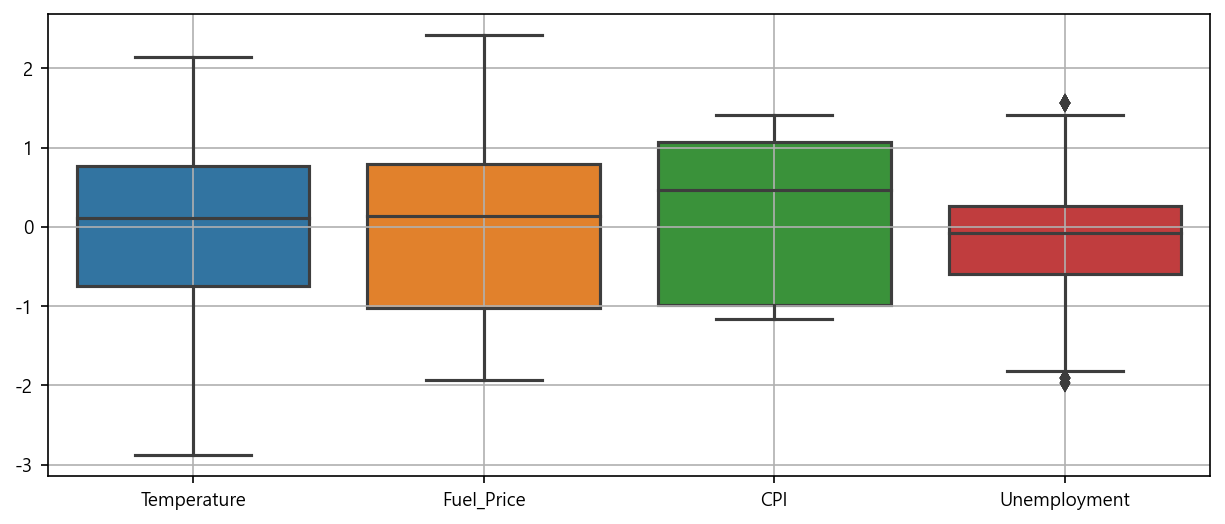

In [62]:
my_boxplot(df3.drop('Weekly_Sales',axis=1))

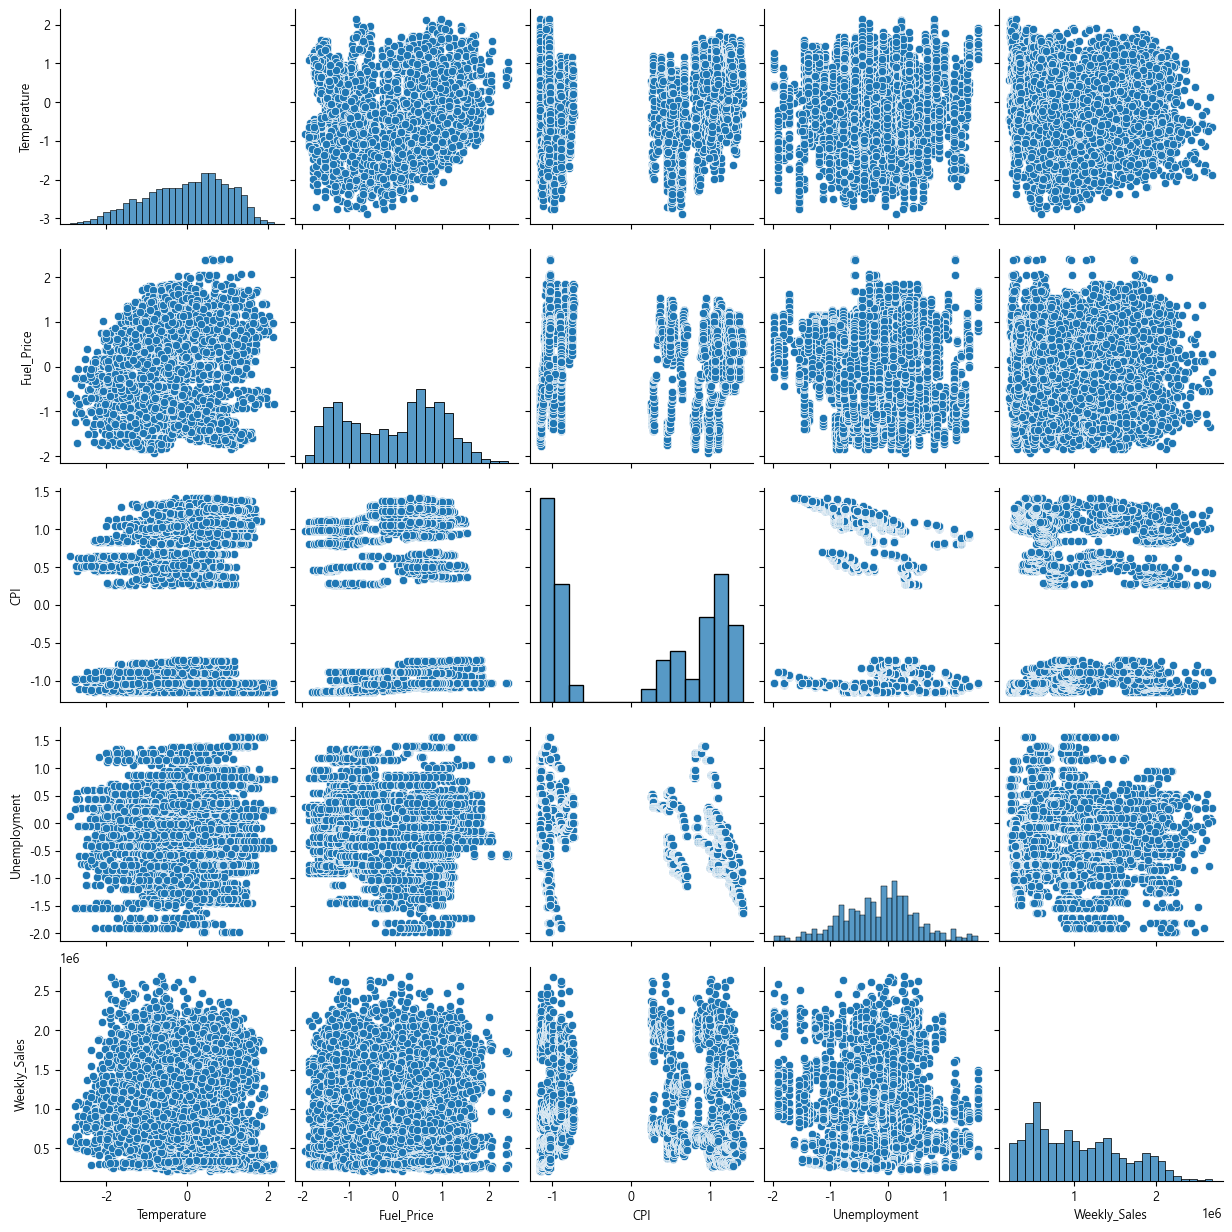

In [63]:
my_pairplot(df3)

In [64]:
df4 = df3.drop('Holiday_Flag',axis=1)
my_pretty_table(df4.head())

+----+---------------+--------------+---------+----------------+----------------+
|    |   Temperature |   Fuel_Price |     CPI |   Unemployment |   Weekly_Sales |
|----+---------------+--------------+---------+----------------+----------------|
|  0 |     -0.995136 |      -1.7138 | 1.00418 |      0.0569637 |    1.64369e+06 |
|  1 |      -1.20117 |     -1.76609 | 1.00788 |      0.0569637 |    1.64196e+06 |
|  2 |      -1.12418 |     -1.84017 | 1.00907 |      0.0569637 |    1.61197e+06 |
|  3 |     -0.760907 |     -1.73777 | 1.00985 |      0.0569637 |    1.40973e+06 |
|  4 |     -0.767955 |     -1.59833 | 1.01062 |      0.0569637 |    1.55481e+06 |
+----+---------------+--------------+---------+----------------+----------------+


In [65]:
yname = 'Weekly_Sales'
x_train, x_test, y_train, y_test = my_train_test_split(df4, yname, test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
Weekly_Sales = -13431.364 * Temperature + -7813.341 * Fuel_Price + -53887.584 * CPI + -79699.870 * Unemployment + 1033117.097

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |       0.015812 |              465565 |         2.99731e+11 |           547477 |                         66.5137 |              -39.5997 |
| 검증데이터 |      0.0149774 |              467506 |         3.00123e+11 |           547835 |                          66.234 |              -39.7024 |
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+--------------------

LinearRegression(n_jobs=-1)

In [66]:
yname = 'Weekly_Sales'
ignore = ['Fuel_Price']
df5 = df4.drop(ignore, axis=1)
x_train, x_test, y_train, y_test = my_train_test_split(df5, yname, test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
Weekly_Sales = -14964.975 * Temperature + -52159.885 * CPI + -77844.605 * Unemployment + 1033498.680

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |      0.0156286 |              465688 |         2.99787e+11 |           547528 |                         66.5087 |              -39.5875 |
| 검증데이터 |      0.0163315 |              467356 |          2.9971e+11 |           547458 |                           66.18 |              -39.6447 |
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
[훈련데이터에 대한 결과보고]
+--

LinearRegression(n_jobs=-1)

In [67]:
yname = 'Weekly_Sales'
ignore = ['Fuel_Price','Temperature']
df5 = df4.drop(ignore, axis=1)
x_train, x_test, y_train, y_test = my_train_test_split(df5, yname, test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
Weekly_Sales = -55516.964 * CPI + -79151.292 * Unemployment + 1033685.775

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |      0.0149354 |              465548 |         2.99998e+11 |           547721 |                          66.678 |               -39.745 |
| 검증데이터 |      0.0180373 |              466635 |          2.9919e+11 |           546983 |                          66.159 |              -39.6308 |
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
[훈련데이터에 대한 결과보고]
+----+--------------+---------

LinearRegression(n_jobs=-1)

#### 이상치를 경계값으로 대체

In [69]:
df3 = my_replace_outliner(df2)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Temperature   6435 non-null   float64 
 1   Fuel_Price    6435 non-null   float64 
 2   CPI           6435 non-null   float64 
 3   Unemployment  6435 non-null   float64 
 4   Weekly_Sales  6435 non-null   float64 
 5   Holiday_Flag  6435 non-null   category
dtypes: category(1), float64(5)
memory usage: 257.9 KB


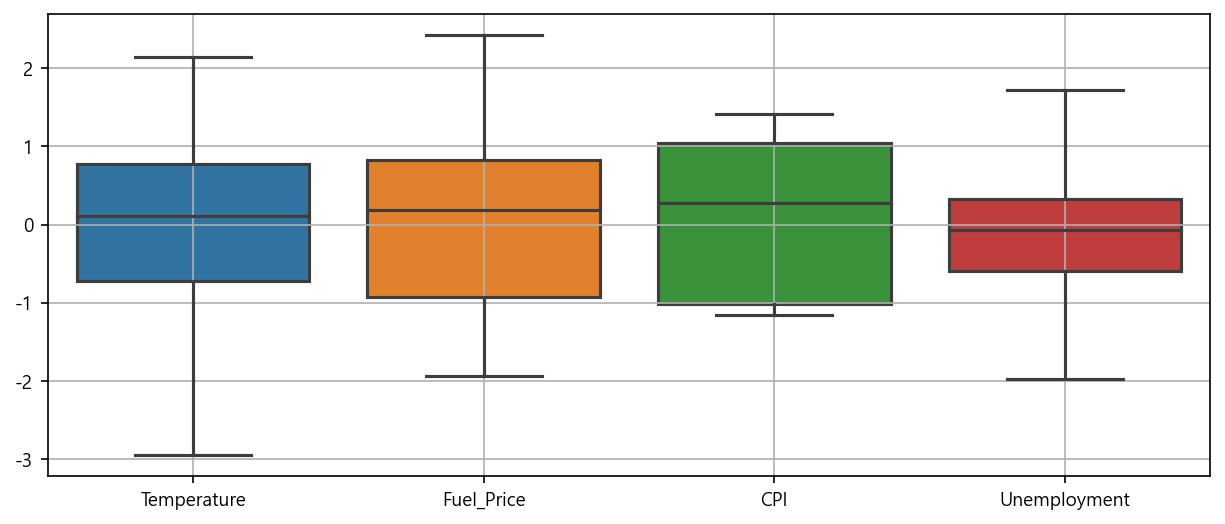

In [70]:
my_boxplot(df3.drop('Weekly_Sales',axis=1))

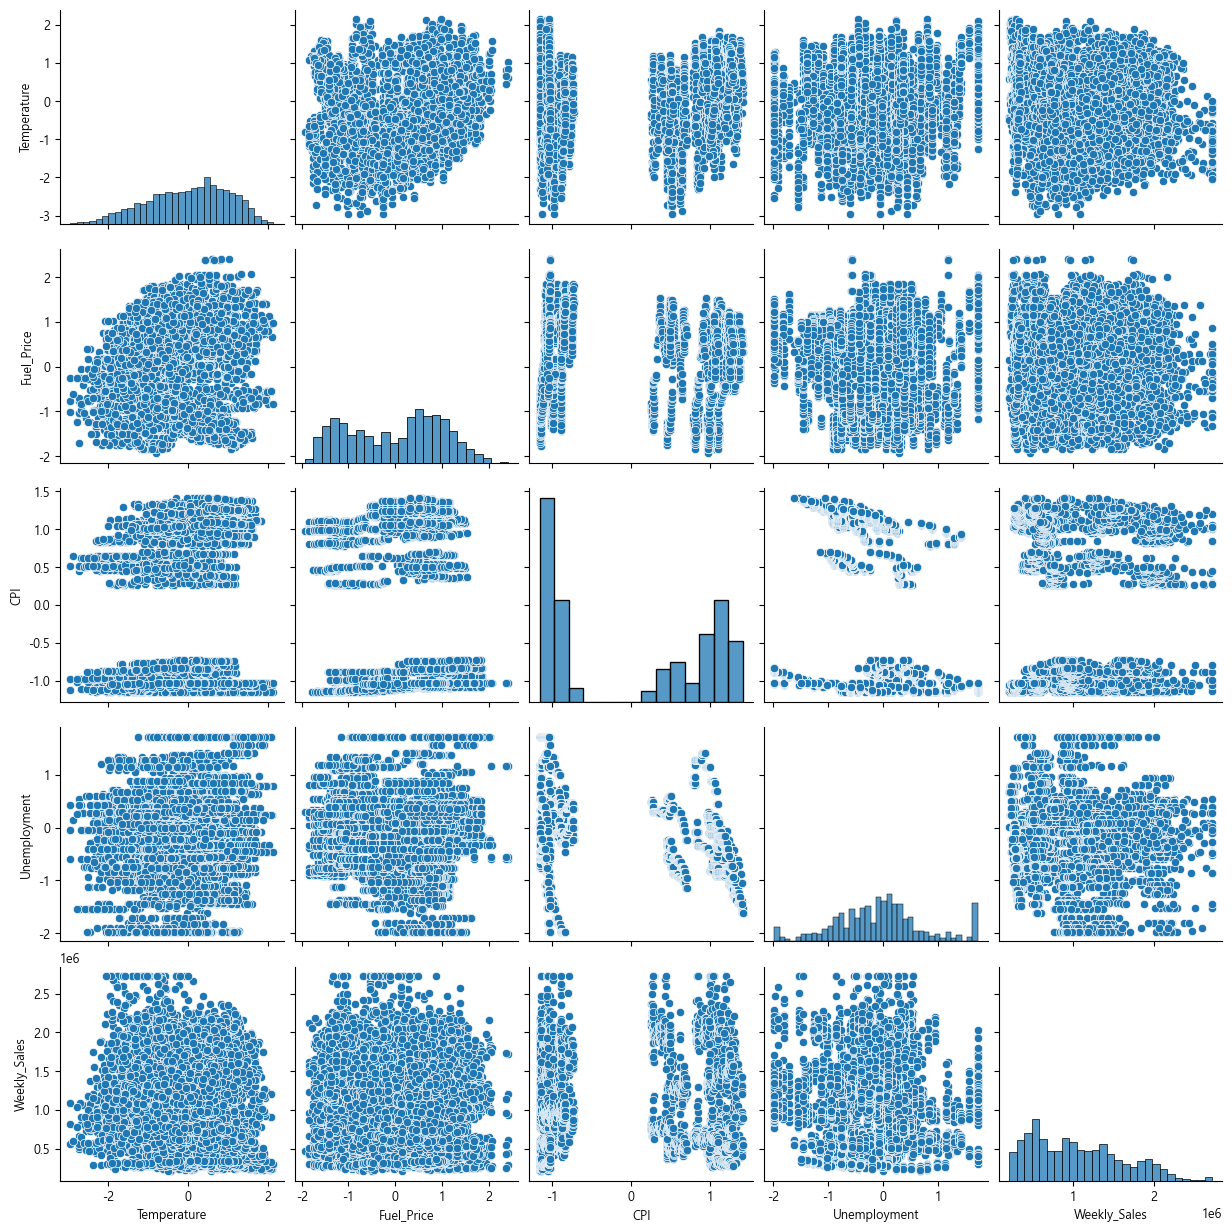

In [71]:
my_pairplot(df3)

In [72]:
df4 = df3.drop('Holiday_Flag',axis=1)
my_pretty_table(df4.head())

+----+---------------+--------------+---------+----------------+----------------+
|    |   Temperature |   Fuel_Price |     CPI |   Unemployment |   Weekly_Sales |
|----+---------------+--------------+---------+----------------+----------------|
|  0 |     -0.995136 |      -1.7138 | 1.00418 |      0.0569637 |    1.64369e+06 |
|  1 |      -1.20117 |     -1.76609 | 1.00788 |      0.0569637 |    1.64196e+06 |
|  2 |      -1.12418 |     -1.84017 | 1.00907 |      0.0569637 |    1.61197e+06 |
|  3 |     -0.760907 |     -1.73777 | 1.00985 |      0.0569637 |    1.40973e+06 |
|  4 |     -0.767955 |     -1.59833 | 1.01062 |      0.0569637 |    1.55481e+06 |
+----+---------------+--------------+---------+----------------+----------------+


In [73]:
yname = 'Weekly_Sales'
x_train, x_test, y_train, y_test = my_train_test_split(df4, yname, test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
Weekly_Sales = -15771.955 * Temperature + -3672.324 * Fuel_Price + -55979.598 * CPI + -91897.169 * Unemployment + 1037266.815

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |        0.02282 |              463878 |         3.03406e+11 |           550823 |                         65.9824 |              -39.3208 |
| 검증데이터 |      0.0296887 |              463515 |         3.01455e+11 |           549049 |                         65.4787 |              -38.1778 |
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+--------------------

LinearRegression(n_jobs=-1)

In [74]:
yname = 'Weekly_Sales'
ignore = ['Fuel_Price']
df5 = df4.drop(ignore, axis=1)
x_train, x_test, y_train, y_test = my_train_test_split(df5, yname, test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
Weekly_Sales = -16539.474 * Temperature + -55114.484 * CPI + -91251.375 * Unemployment + 1037312.839

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |      0.0227803 |              463882 |         3.03418e+11 |           550834 |                          65.973 |               -39.313 |
| 검증데이터 |      0.0294103 |              463534 |         3.01541e+11 |           549128 |                         65.4656 |              -38.1686 |
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
[훈련데이터에 대한 결과보고]
+--

LinearRegression(n_jobs=-1)

In [75]:
yname = 'Weekly_Sales'
ignore = ['Fuel_Price','Temperature']
df5 = df4.drop(ignore, axis=1)
x_train, x_test, y_train, y_test = my_train_test_split(df5, yname, test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
Weekly_Sales = -58675.137 * CPI + -94318.744 * Unemployment + 1037294.457

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |      0.0219295 |              463469 |         3.03683e+11 |           551074 |                         66.1093 |              -39.4682 |
| 검증데이터 |      0.0284669 |              462973 |         3.01835e+11 |           549395 |                         65.6157 |               -38.425 |
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
[훈련데이터에 대한 결과보고]
+----+--------------+---------

LinearRegression(n_jobs=-1)

통제요인 선정하기

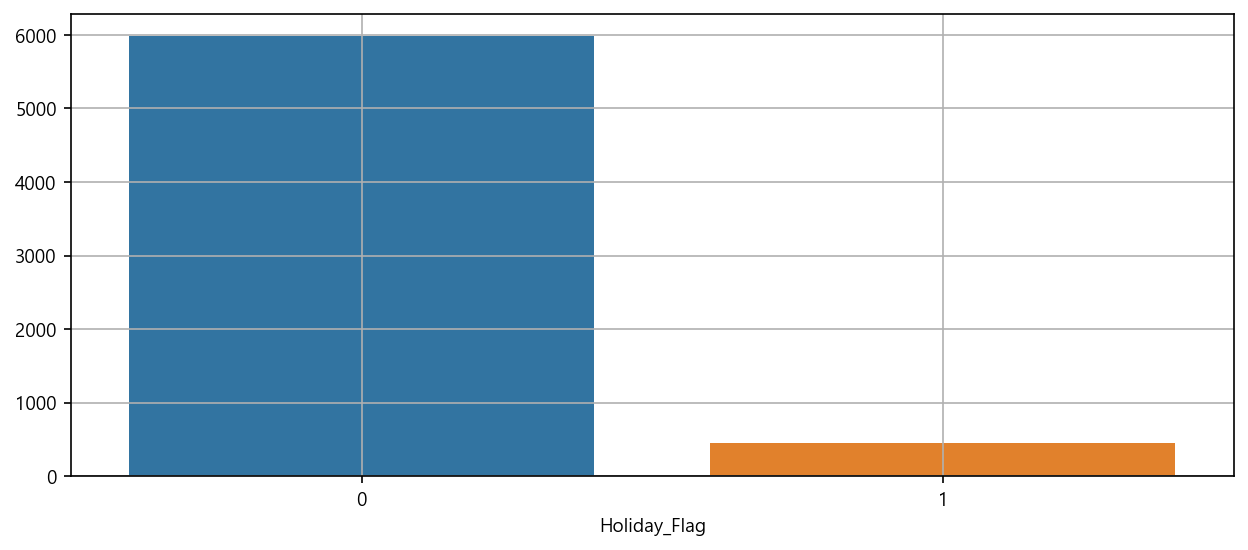

In [82]:
my_countplot(df3[['Holiday_Flag']],'Holiday_Flag')

In [83]:
df_Holiday = df3[['Holiday_Flag', 'Weekly_Sales']]
df_Holiday

,Holiday_Flag,Weekly_Sales
0,0,1643690.90
1,1,1641957.44
2,0,1611968.17
3,0,1409727.59
4,0,1554806.68
...,...,...
6430,0,713173.95
6431,0,733455.07
6432,0,734464.36
6433,0,718125.53


In [84]:
my_normal_equal_var_1field(df_Holiday, xname='Weekly_Sales', hue='Holiday_Flag')

+---------+-------------+-------------+----------+
| field   |   statistic |     p-value | result   |
|---------+-------------+-------------+----------|
| 0       |     413.112 | 1.96737e-90 | False    |
| 1       |     28.8902 | 5.32808e-07 | False    |
| Levene  |     10.5716 |   0.0011543 | False    |
+---------+-------------+-------------+----------+


In [85]:
my_anova(df_Holiday, target='Weekly_Sales', hue='Holiday_Flag', equal_var=False)

pingouin.welch_anova
+----+--------------+---------+---------+---------+------------+-----------+
|    | Source       |   ddof1 |   ddof2 |       F |      p-unc |       np2 |
|----+--------------+---------+---------+---------+------------+-----------|
|  0 | Holiday_Flag |       1 | 504.218 | 7.13272 | 0.00781348 | 0.0013471 |
+----+--------------+---------+---------+---------+------------+-----------+

statsmodels.anova.anova_lm
+-----------------+------+-------------+-------------+---------+------------+
|                 |   df |      sum_sq |     mean_sq |       F |     PR(>F) |
|-----------------+------+-------------+-------------+---------+------------|
| C(Holiday_Flag) |    1 | 2.69186e+12 | 2.69186e+12 | 8.67757 | 0.00323304 |
| Residual        | 6433 | 1.99557e+15 | 3.10209e+11 |     nan |        nan |
+-----------------+------+-------------+-------------+---------+------------+
[anova_lm] statistic: 8.678, p-value: 0.003, 대립가설 채택


In [87]:
df4 = get_dummies(df3, columns=['Holiday_Flag'], drop_first=True)
my_pretty_table(df4.head())

+----+---------------+--------------+---------+----------------+----------------+------------------+
|    |   Temperature |   Fuel_Price |     CPI |   Unemployment |   Weekly_Sales |   Holiday_Flag_1 |
|----+---------------+--------------+---------+----------------+----------------+------------------|
|  0 |     -0.995136 |      -1.7138 | 1.00418 |      0.0569637 |    1.64369e+06 |                0 |
|  1 |      -1.20117 |     -1.76609 | 1.00788 |      0.0569637 |    1.64196e+06 |                1 |
|  2 |      -1.12418 |     -1.84017 | 1.00907 |      0.0569637 |    1.61197e+06 |                0 |
|  3 |     -0.760907 |     -1.73777 | 1.00985 |      0.0569637 |    1.40973e+06 |                0 |
|  4 |     -0.767955 |     -1.59833 | 1.01062 |      0.0569637 |    1.55481e+06 |                0 |
+----+---------------+--------------+---------+----------------+----------------+------------------+


In [88]:
x_test, x_train, y_test, y_train = my_train_test_split(df4, 'Weekly_Sales', test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
Weekly_Sales = -11491.098 * Temperature + -13754.102 * Fuel_Price + -76696.642 * CPI + -105357.069 * Unemployment + 134779.425 * Holiday_Flag_1 + 1034906.302

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |      0.0349116 |              462904 |         2.99832e+11 |           547569 |                          65.772 |              -38.9256 |
| 검증데이터 |      0.0206783 |              465146 |         3.04071e+11 |           551426 |                         66.5988 |              -40.3146 |
+------------+----------------+---------------------+---------------------+------------------+----------------------

LinearRegression(n_jobs=-1)

In [91]:
df5 = df4.drop(['Fuel_Price','Temperature'], axis=1)
x_test, x_train, y_test, y_train = my_train_test_split(df5, 'Weekly_Sales', test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
Weekly_Sales = -75961.521 * CPI + -105762.248 * Unemployment + 143858.980 * Holiday_Flag_1 + 1033547.098

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |      0.0338205 |              462394 |         3.00171e+11 |           547879 |                         65.7903 |              -38.9939 |
| 검증데이터 |      0.0205936 |              464580 |         3.04097e+11 |           551450 |                         66.6085 |              -40.3029 |
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
[훈련데이터에 대한 결과보고]

LinearRegression(n_jobs=-1)